### 크롤링 데이터

In [1]:
import pandas as pd

from collections import Counter

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
import sys

from wordcloud import WordCloud
import platform

import requests

from tqdm import tqdm_notebook

import folium

from folium.plugins import MarkerCluster

In [2]:
last_raw_total = pd.read_excel('./files/last_crawling_raw.xlsx')

In [3]:
last_tags_total = []

for tags in last_raw_total['tags']:
    last_tags_list = tags[2:-2].split("', '")
    for tag in last_tags_list:
        last_tags_total.append(tag)

In [4]:
last_tag_counts = Counter(last_tags_total)

In [5]:
if sys.platform in ["win32", "win64"]:
    font_name = "malgun gothic"
elif sys.platform == "darwin":
    font_name = "AppleGothic"

rc('font',family=font_name)

In [6]:
last_tag_counts_df = pd.DataFrame(last_tag_counts.most_common(30))
last_tag_counts_df.columns = ['tags', 'counts']

<AxesSubplot:xlabel='counts', ylabel='tags'>

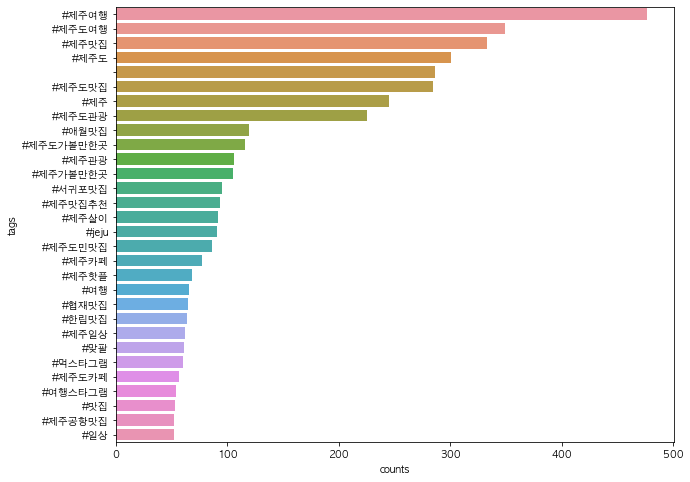

In [7]:
plt.figure(figsize=(10,8)) 
sns.barplot(x='counts', y='tags', data = last_tag_counts_df)

In [8]:
if platform.system() == 'Windows':   #윈도우의 경우
    font_path = "c:/Windows/Fonts/malgun.ttf"
elif platform.system() == "Darwin":   #Mac 의 경우
    font_path = "/Users/$USER/Library/Fonts/AppleGothic.ttf"

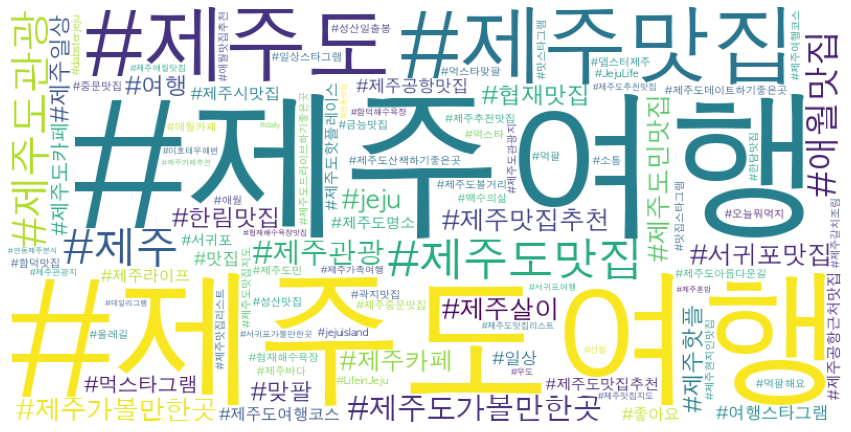

In [9]:
wordcloud=WordCloud(font_path= font_path, 
                    background_color="white",
                    max_words=100,
                    relative_scaling= 0.3,
                    width = 800,
                    height = 400
                 ).generate_from_frequencies(last_tag_counts)  
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('./files/last_tag-wordcloud.png') 

In [10]:
last_location_counts = last_raw_total['place'].value_counts( )

In [11]:
last_location_counts_df = pd.DataFrame(last_location_counts)

In [12]:
last_location_counts_df.to_excel('./files/last_location_counts.xlsx')

In [13]:
last_locations = list( last_location_counts.index )

In [14]:
def find_places(searching):
    url = 'https://dapi.kakao.com/v2/local/search/keyword.json?query={}'.format(searching)
    
    headers = {
    "Authorization": "KakaoAK 5e96943c943636b37f24cd5c657d92b3"
    }
    
    places = requests.get(url, headers = headers).json()['documents']
    
    place = places[0] 
    name = place['place_name']
    x=place['x']
    y=place['y']
    data = [name, x, y, searching] 

    return data

In [15]:
import time
last_locations_inform = [ ]
for location in tqdm_notebook(last_locations):
    try:
        data = find_places(location)       
        last_locations_inform.append(data) 
        time.sleep(0.5) 
    except:
        pass

<ipython-input-15-b9e3f337bba4>:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for location in tqdm_notebook(last_locations):


  0%|          | 0/389 [00:00<?, ?it/s]

In [16]:
last_locations_inform_df = pd.DataFrame(last_locations_inform)
last_locations_inform_df.columns = ['name_official','경도','위도','인스타위치명']
last_locations_inform_df.to_excel('./files/last_locations.xlsx', index=False)

In [17]:
last_location_data = pd.merge(last_locations_inform_df, last_location_counts_df, 
                         how = 'inner', left_on = 'name_official', right_index=True)

In [18]:
last_location_data = last_location_data.pivot_table(
    index = ['name_official','경도','위도'], 
    values = 'place', 
    aggfunc='sum')

In [19]:
last_location_data.to_excel('./files/last_location_inform.xlsx')

In [20]:
last_location_data = pd.read_excel('./files/last_location_inform.xlsx')

In [21]:
Mt_Hanla =[33.362500, 126.533694]
last_map_jeju = folium.Map(location = Mt_Hanla, zoom_start = 11)

for i in range(len(last_location_data)):
    name = last_location_data['name_official'][i]    # 공식명칭
    count = last_location_data['place'][i]           # 게시글 개수
    size = int(count)*2
    long = float(last_location_data['위도'][i])      
    lat = float(last_location_data['경도'][i])       
    folium.CircleMarker((long,lat), radius = size, color='red', popup=name).add_to(last_map_jeju)
    
last_map_jeju

In [22]:
last_map_jeju.save('./files/last_jeju.html')

In [23]:
locations = []
names = []

for i in range(len(last_location_data)):
    data = last_location_data.iloc[i]  # 행 하나씩
    locations.append((float(data['위도']),float(data['경도'])))    # 위도 , 경도 순으로..
    names.append(data['name_official'])

Mt_Hanla =[33.362500, 126.533694]
last_map_jeju2 = folium.Map(location = Mt_Hanla, zoom_start = 11)
                       
marker_cluster = MarkerCluster(
    locations=locations, popups=names,
    name='Jeju',
    overlay=True,
    control=True,
)

marker_cluster.add_to(last_map_jeju2)
folium.LayerControl().add_to(last_map_jeju2)

last_map_jeju2

In [24]:
last_map_jeju2.save('./files/last_jeju_cluster.html')

### 8800 데이터

In [25]:
raw_total = pd.read_excel('./files_8800/1_crawling_raw.xlsx')

In [26]:
tags_total = []

for tags in raw_total['tags']:
    tags_list = tags[2:-2].split("', '")
    for tag in tags_list:
        tags_total.append(tag)

In [27]:
tag_counts = Counter(tags_total)

In [28]:
if sys.platform in ["win32", "win64"]:
    font_name = "malgun gothic"
elif sys.platform == "darwin":
    font_name = "AppleGothic"

rc('font',family=font_name)

In [29]:
tag_counts_df = pd.DataFrame(tag_counts.most_common(30))
tag_counts_df.columns = ['tags', 'counts']

<AxesSubplot:xlabel='counts', ylabel='tags'>

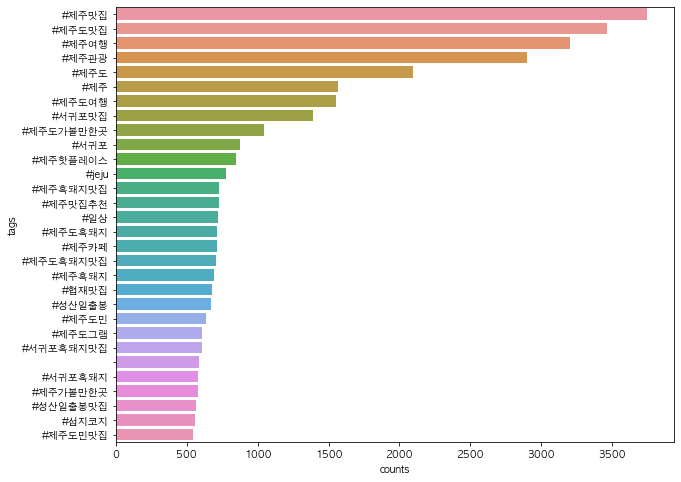

In [30]:
plt.figure(figsize=(10,8)) 
sns.barplot(x='counts', y='tags', data = tag_counts_df)

In [31]:
if platform.system() == 'Windows':   #윈도우의 경우
    font_path = "c:/Windows/Fonts/malgun.ttf"
elif platform.system() == "Darwin":   #Mac 의 경우
    font_path = "/Users/$USER/Library/Fonts/AppleGothic.ttf"

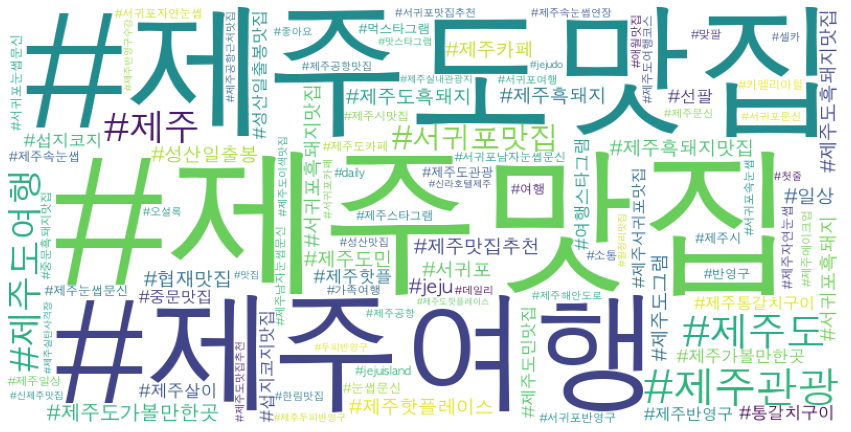

In [32]:
wordcloud=WordCloud(font_path= font_path, 
                    background_color="white",
                    max_words=100,
                    relative_scaling= 0.3,
                    width = 800,
                    height = 400
                 ).generate_from_frequencies(tag_counts)  
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('./files_8800/1_tag-wordcloud.png') 

In [33]:
location_counts = raw_total['place'].value_counts( )

In [34]:
location_counts_df = pd.DataFrame(location_counts)

In [35]:
location_counts_df.to_excel('./files_8800/1_location_counts.xlsx')

In [36]:
locations = list( location_counts.index )

In [37]:
def find_places(searching):
    url = 'https://dapi.kakao.com/v2/local/search/keyword.json?query={}'.format(searching)
    
    headers = {
    "Authorization": "KakaoAK 5e96943c943636b37f24cd5c657d92b3"
    }
    
    places = requests.get(url, headers = headers).json()['documents']
    
    place = places[0] 
    name = place['place_name']
    x=place['x']
    y=place['y']
    data = [name, x, y, searching] 

    return data

In [38]:
import time
locations_inform = [ ]
for location in tqdm_notebook(locations):
    try:
        data = find_places(location)       
        locations_inform.append(data) 
        time.sleep(0.5) 
    except:
        pass

<ipython-input-38-71c2fc93df95>:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for location in tqdm_notebook(locations):


  0%|          | 0/1028 [00:00<?, ?it/s]

In [39]:
locations_inform_df = pd.DataFrame(locations_inform)
locations_inform_df.columns = ['name_official','경도','위도','인스타위치명']
locations_inform_df.to_excel('./files_8800/1_locations.xlsx', index=False)

In [40]:
location_data = pd.merge(locations_inform_df, location_counts_df, 
                         how = 'inner', left_on = 'name_official', right_index=True)

In [41]:
location_data = location_data.pivot_table(
    index = ['name_official','경도','위도'], 
    values = 'place', 
    aggfunc='sum')

In [42]:
location_data.to_excel('./files_8800/1_location_inform.xlsx')

In [43]:
location_data = pd.read_excel('./files_8800/1_location_inform.xlsx')

In [44]:
Mt_Hanla =[33.362500, 126.533694]
map_jeju = folium.Map(location = Mt_Hanla, zoom_start = 11)

for i in range(len(location_data)):
    name = location_data['name_official'][i]    # 공식명칭
    count = location_data['place'][i]           # 게시글 개수
    size = int(count)*2
    long = float(location_data['위도'][i])      
    lat = float(location_data['경도'][i])       
    folium.CircleMarker((long,lat), radius = size, color='red', popup=name).add_to(map_jeju)
    
map_jeju

In [45]:
map_jeju.save('./files_8800/1_jeju.html')

In [46]:
locations = []
names = []

for i in range(len(location_data)):
    data = location_data.iloc[i]  # 행 하나씩
    locations.append((float(data['위도']),float(data['경도'])))    # 위도 , 경도 순으로..
    names.append(data['name_official'])

Mt_Hanla =[33.362500, 126.533694]
map_jeju2 = folium.Map(location = Mt_Hanla, zoom_start = 11)
                       
marker_cluster = MarkerCluster(
    locations=locations, popups=names,
    name='Jeju',
    overlay=True,
    control=True,
)

marker_cluster.add_to(map_jeju2)
folium.LayerControl().add_to(map_jeju2)

map_jeju2

In [47]:
map_jeju2.save('./files_8800/1_jeju_cluster.html')